In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
df = pd.read_csv("./water_potability.csv")

In [3]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
np.shape(df)

(104832, 10)

In [5]:
print("Number of null values in different columns")
print(df.isna().sum())

Number of null values in different columns
ph                 15712
Hardness               0
Solids                 0
Chloramines            0
Sulfate            24992
Conductivity           0
Organic_carbon         0
Trihalomethanes     5184
Turbidity              0
Potability             0
dtype: int64


In [6]:
df=df.dropna()

In [7]:
# df.loc[(df['ph'].isna() == True), 'ph'] = df['ph'].mean()
# df.loc[(df['Sulfate'].isna() == True), 'Sulfate'] = df['Sulfate'].mean()
# df.loc[(df['Trihalomethanes'].isna() == True), 'Trihalomethanes'] = df['Trihalomethanes'].mean()

In [8]:
np.shape(df)

(64352, 10)

In [9]:
print("Number of null values after dropping null values")
print(df.isna().sum())

Number of null values after dropping null values
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.572958,32.627223,8640.157938,1.584438,41.195246,80.693129,3.324158,16.073237,0.780158,0.490560
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089431,176.736376,15613.160530,6.137757,307.621462,366.558131,12.120956,55.947322,3.442848,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.053044,216.454108,27192.280560,8.110140,359.392567,482.451933,16.684074,77.297300,4.515150,1.000000
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [11]:
df.reset_index(inplace=True)
df=df.drop(['index'],axis=1)

In [12]:
df.groupby("Potability").count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,38400,38400,38400,38400,38400,38400,38400,38400,38400
1,25952,25952,25952,25952,25952,25952,25952,25952,25952


In [13]:
y = df['Potability']
X = df.drop(['Potability'],axis=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [18]:
print('Size Training Set: {}'.format(len(X_train)))
print('Size Testing Set: {}'.format(len(X_test)))

Size Training Set: 57916
Size Testing Set: 6436


In [19]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",mode = 'auto',patience=15)

In [21]:
model = keras.Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=9))
model.add(layers.Dense(1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
opt = keras.optimizers.Adam()

model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])
# history = model.fit(X_train, y_train, batch_size=75, epochs=300, validation_data=(X_test, y_test))

Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 4s 61us/sample - loss: 0.2427 - acc: 0.5926 - val_loss: 0.2358 - val_acc: 0.6287
Epoch 2/400
57916/57916 [==============================] - 3s 52us/sample - loss: 0.2325 - acc: 0.6216 - val_loss: 0.2265 - val_acc: 0.6434
Epoch 3/400
57916/57916 [==============================] - 3s 44us/sample - loss: 0.2249 - acc: 0.6395 - val_loss: 0.2184 - val_acc: 0.6650
Epoch 4/400
57916/57916 [==============================] - 2s 43us/sample - loss: 0.2183 - acc: 0.6557 - val_loss: 0.2114 - val_acc: 0.6751
Epoch 5/400
57916/57916 [==============================] - 3s 44us/sample - loss: 0.2114 - acc: 0.6754 - val_loss: 0.2075 - val_acc: 0.6967
Epoch 6/400
57916/57916 [==============================] - 3s 48us/sample - loss: 0.2054 - acc: 0.6871 - val_loss: 0.2001 - val_acc: 0.7001
Epoch 7/400
57916/57916 [==============================] - 2s 42us/sample - loss: 0.2015 - acc: 0.6921 - val_lo

In [24]:
import matplotlib.pyplot as plt


In [25]:
# plt.figure(figsize=[20,8])

# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy', size=25, pad=20)
# plt.ylabel('Accuracy', size=15)
# plt.xlabel('Epoch', size=15)
# plt.legend(['train', 'test'], loc='upper left')

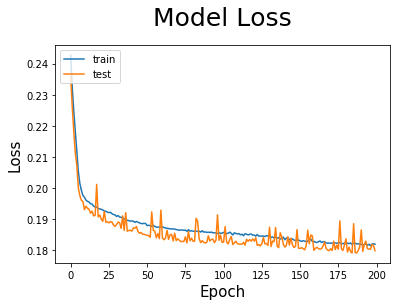

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

In [27]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [28]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

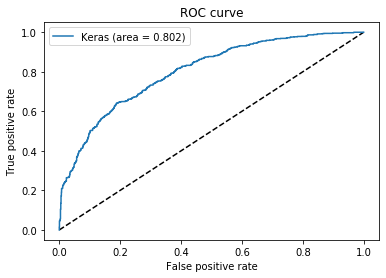

In [29]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [30]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [32]:
import seaborn as sns


Text(0.5, 15.0, 'Predicted label')

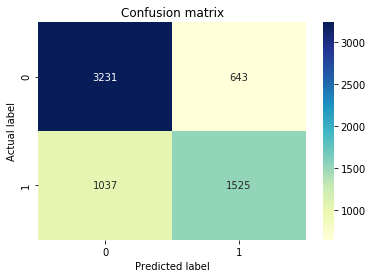

In [33]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')